**Learning goals:**

- Know how to describe what sensitive dependence on initial conditions means in a mathematical way. 
- Be able to explain why sensitive dependence on initial conditions makes it impossible to accurately predict the long-term future, when behavior is chaotic. 
- Be able to explain why it's still possible to predict the short-term future, even in the presence of chaos. 


Recall ***sensitive dependence on initial conditions*** in the discrete logistic model

In [1]:
X_next(X) = 4*X*(1 - X)

t_list = srange(100)
X_list1 = [0.3521729]
X_list2 = [0.3521728]
for t in t_list:
    X_list1.append(X_next(X_list1[-1]))
    X_list2.append(X_next(X_list2[-1]))
difference = [abs(x1 - x2) for x1, x2 in zip(X_list1, X_list2)]

list_of_points1 = list(zip(t_list, X_list1))
list_of_points2 = list(zip(t_list, X_list2))
diff_points = list(zip(t_list, difference))

Solution 1's starting state: 0.3521729
Solution 2's starting state: 0.3521728


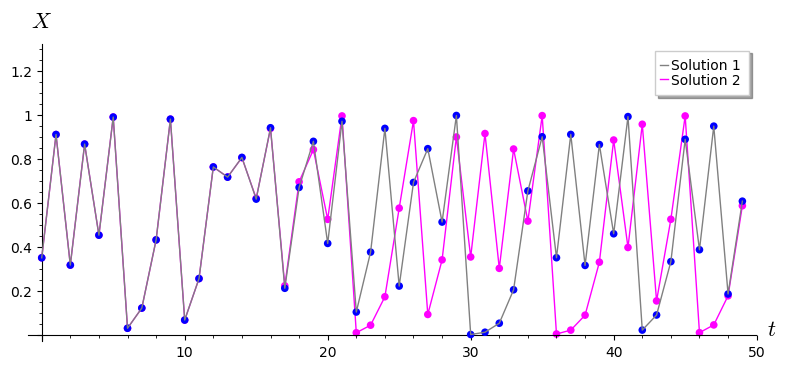

In [2]:
print("Solution 1's starting state: {}".format(float(X_list1[0])))
print("Solution 2's starting state: {}".format(float(X_list2[0])))
p  = list_plot(list_of_points1[:50], color="blue", size=30, zorder=3)
p += list_plot(list_of_points1[:50], plotjoined=True, color="gray", zorder=3, legend_label="Solution 1")
p += list_plot(list_of_points2[:50], color="fuchsia", size=30)
p += list_plot(list_of_points2[:50], plotjoined=True, color="fuchsia", legend_label="Solution 2")
p.show(ymin=0, ymax=1.3, axes_labels=("$t$", "$X$"), aspect_ratio=0.4*50/1.3, figsize=8)

**Mathematical meaning of sensitive dependence on initial conditions:**

<div style="font-size: smaller">
For a one-dimensional model, suppose $X(t)$ and $Y(t)$ represent two different solutions that start very close together. That is, the distance between $X(0)$ and $Y(0)$ is small: 
$$ \mathrm{dist} \big( X(0), Y(0) \big) = \big| X(0) - Y(0) \big| \approx 0 $$

*Sensitive dependence on initial conditions* means that this distance will grow approximately exponentially, at first. That is, there is some constant $\lambda$ and some time $t_{final}$ such that 
$$ \mathrm{dist} \big( X(t), Y(t) \big) \approx \mathrm{dist} \big( X(0), Y(0) \big) \cdot e^{\lambda t} $$
for all $t < t_{final}$. 

The constant $\lambda$ is called the ***Lyapunov exponent*** of the model. 
</div>

**Example:** Mathematical meaning of sensitive dependence on initial conditions, using the discrete logistic model


In [3]:
print("1st:  " + ", ".join(["{:.9f}".format(float(X)) for X in X_list1[:5]] + ["..."]))
print("2nd:  " + ", ".join(["{:.9f}".format(float(X)) for X in X_list2[:5]] + ["..."]))
print("-" * 75)
print("Diff: " + ", ".join(["{:.9f}".format(float(X)) for X in difference[:5]] + ["..."]))

1st:  0.352172900, 0.912588594, 0.319082608, 0.869075590, 0.455132837, ...
2nd:  0.352172800, 0.912588476, 0.319082999, 0.869076155, 0.455131169, ...
---------------------------------------------------------------------------
Diff: 0.000000100, 0.000000118, 0.000000390, 0.000000565, 0.000001668, ...


**Example:** Mathematical meaning of sensitive dependence on initial conditions, using the discrete logistic model


In [4]:
@interact(end=slider(8, 28, 4, default=5, label="Show until:"))
def update(end):
    p  = list_plot(diff_points[:end+1], color="cyan", size=30)
    p += list_plot(diff_points[:end+1], plotjoined=True, color="cyan")
    ymax = max(difference[:end+1])
    p.show(ymin=0, axes_labels=("$t$", "Distance"), aspect_ratio=0.4*end/ymax, figsize=8)

Interactive function <function update at 0x7fd7cd8d0158> with 1 widget
  end: TransformIntSlider(value=8, desc…

**Another way to think of sensitive dependence on initial conditions:** 

<div style="font-size: smaller">

Recall that the Fundamental Existence and Uniqueness Theorem guarantees us that, for any initial state, a solution **exists**. That is the ***actual solution*** for that initial state. 

We use Euler's method (or `desolve_odeint`) to approximate that solution. This approximation will always have some error. (We make $\Delta t$ small to minimize that error, but we can never get rid of it completely.) 

That ***error*** is a difference between the ***actual solution*** and our ***approximate solution***. Thanks to sensitive dependence on initial conditions, that difference will grow exponentially, so that eventually, our *approximate solution* is *very very different* from the *actual solution*. 
</div>


**What we just said:**

<div style="font-size: smaller">

If a model has chaotic behavior, any ***error*** introduced into a solution will just grow exponentially. 

This means that eventually, in the long run, that error will grow huge. 

Fortunately, exponential growth starts out growing slowly. So the error will remain small for a little while. 

**Conclusion:** 
- Short-term predictions can be accurate. 
- Long-term predictions will never be accurate. 
</div>


In [5]:
X_next(X) = 4*X*(1 - X)
@interact(steps=slider(srange(10) + srange(95, 101), label="Steps:"))
def update(steps):
    t_list = srange(steps+1)
    initial_state = float(0.28)
    X_list = [initial_state]
    for t in t_list:
        X_list.append(X_next(X_list[-1]))
    list_of_points = list(zip(t_list, X_list))

    print("  t    X_t")
    print("—" * 70)
    for t, X in list_of_points:
        if t == 11:
            print("\n           . . . \n")
        if not 10 < t < 95:
            print("{:3d}    {}".format(t, X))


Interactive function <function update at 0x7fd7e4376f28> with 1 widget
  steps: SelectionSlider(description='S…

In [6]:
X_next(X) = 4*X*(1 - X)
@interact(precision=slider(["default"] + [20, 25, 30, 35, 40, 45, 50], label="Precision:"))
def update(precision):
    t_list = srange(101)
    initial_state = float(0.28) if precision == "default" else N(0.28, digits=precision)
    X_list = [initial_state]
    for t in t_list:
        X_list.append(X_next(X_list[-1]))
    list_of_points = list(zip(t_list, X_list))

    print("  t    X_t")
    print("—" * 70)
    for t, X in list_of_points:
        if t == 11:
            print("\n           . . . \n")
        if not 10 < t < 95:
            print("{:3d}    {}".format(t, X))


Interactive function <function update at 0x7fd7e4376d08> with 1 widget
  precision: SelectionSlider(descriptio…

In [7]:
X_next(X) = 4*X*(1 - X)
@interact(steps=slider(1, 9, 1, label="Steps:"))
def update(steps):
    print("initial_state = 28/100")
    initial_state = 28/100
    t_list = srange(steps)
    X_list = [initial_state]
    for t in t_list:
        X_list.append(X_next(X_list[-1]))
    list_of_points = list(zip(t_list, X_list))

    for t, X in list_of_points:
        show(r"X_{} = ".format(t) + latex(X))

Interactive function <function update at 0x7fd7e42b2b70> with 1 widget
  steps: TransformIntSlider(value=1, de…

**Conclusions:**

1. Sensitive dependence on initial conditions means that, given two solutions to a mathematical model with chaotic behavior, the *distance between those two solutions* will ***grow exponentially*** over time. Or, in other words, if a solution starts with even a tiny amount of error (difference between it and the “correct” solution), the size of that error will grow exponentially. 


**Conclusions, cont'd:**

2. For a model with chaotic behavior, even if we start with exactly the right state, and even if the model is a discrete-time one (so there is no error/inaccuracy from using Euler's method), rounding errors are unavoidable when simulating the model. Therefore it is impossible to make precise predictions about the state of the system a long time into the future. 


**Conclusions, cont'd:**

3. Because exponential growth starts out slowly, the error does not grow significantly over short periods of time. Therefore short-term predictions can still be made accurately, if the initial state is accurate enough. 


In [8]:
x0 = 35/100
x0

7/20

In [11]:
N(x0)

0.350000000000000

In [12]:
N(x0, digits=50)

0.35000000000000000000000000000000000000000000000000